In [1]:
import pandas as pd
import numpy as np

In [2]:
df2=pd.read_csv('C:/Users/ashiq/Desktop/csv/assignment_4/Salary_Data.csv')

In [6]:
df1_copy=df2.copy()

In [7]:
df2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
df2.shape

(30, 2)

In [9]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
df2.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [11]:
df2.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


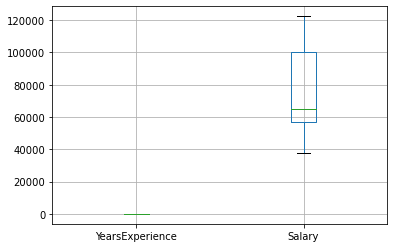

In [12]:
df2.boxplot()

In [13]:
array=df2.values

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,0:2])

In [15]:
rescaledX

array([[0.        , 0.01904087],
       [0.0212766 , 0.1000945 ],
       [0.04255319, 0.        ],
       [0.09574468, 0.06843846],
       [0.11702128, 0.02551382],
       [0.19148936, 0.22337586],
       [0.20212766, 0.26481219],
       [0.22340426, 0.19742499],
       [0.22340426, 0.31554453],
       [0.27659574, 0.229837  ],
       [0.29787234, 0.30105126],
       [0.30851064, 0.21335932],
       [0.30851064, 0.22709662],
       [0.31914894, 0.2285613 ],
       [0.36170213, 0.27616348],
       [0.40425532, 0.35680369],
       [0.42553191, 0.33425467],
       [0.44680851, 0.53575478],
       [0.5106383 , 0.51537916],
       [0.5212766 , 0.66393811],
       [0.60638298, 0.63792818],
       [0.63829787, 0.7151193 ],
       [0.72340426, 0.75089771],
       [0.75531915, 0.89866525],
       [0.80851064, 0.84691708],
       [0.84042553, 0.80145287],
       [0.89361702, 0.93595559],
       [0.90425532, 0.88476258],
       [0.9787234 , 1.        ],
       [1.        , 0.9938696 ]])

In [16]:
column_values = ['YearsExperience','Salary'] 
df = pd.DataFrame(data = rescaledX,   
                  columns = column_values)

In [17]:
df

,YearsExperience,Salary
0,0.000000,0.019041
1,0.021277,0.100094
2,0.042553,0.000000
3,0.095745,0.068438
4,0.117021,0.025514
5,0.191489,0.223376
6,0.202128,0.264812
7,0.223404,0.197425
8,0.223404,0.315545
9,0.276596,0.229837


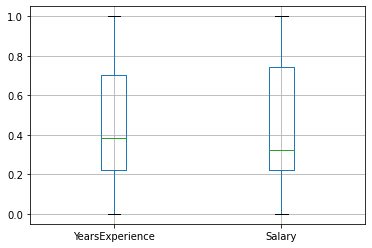

In [18]:
df.boxplot()

In [19]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [20]:
from scipy.stats import kurtosis 
from scipy.stats import skew 
(kurtosis(df['YearsExperience']),skew(df['Salary']))

(-1.0447521989892934, 0.3361618825592921)

In [21]:
(skew(df['YearsExperience']),skew(df['Salary']))

(0.3603123252525565, 0.3361618825592921)

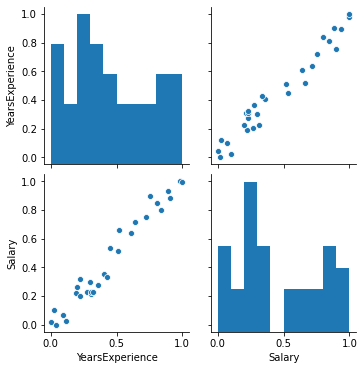

In [22]:
import seaborn as sns
sns.pairplot(df)

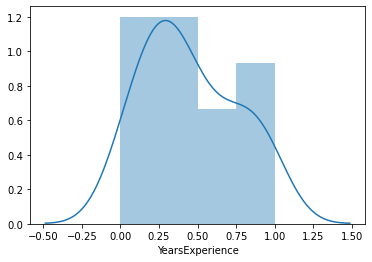

In [23]:
sns.distplot(df.YearsExperience)


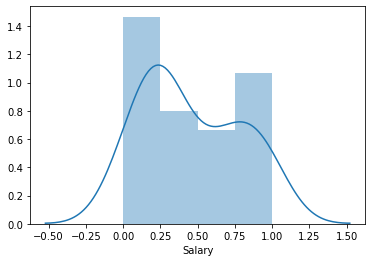

In [24]:
sns.distplot(df.Salary)

In [25]:
import statsmodels.formula.api as smf
model1=smf.ols('df.Salary~df.YearsExperience', data= df).fit()

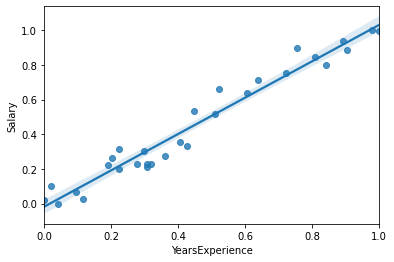

In [26]:
sns.regplot(x=df.YearsExperience,y=df.Salary, data=df)


In [27]:
model1.params

Intercept            -0.018236
df.YearsExperience    1.049252
dtype: float64

In [28]:
(model1.tvalues, model1.pvalues)



(Intercept             -0.806598
 df.YearsExperience    24.950094
 dtype: float64,
 Intercept             4.266967e-01
 df.YearsExperience    1.143068e-20
 dtype: float64)

In [29]:
(model1.rsquared,model1.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

# standard scalar

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
array = df1_copy.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

In [32]:
column_values = ['YearsExperience','Salary'] 
df3 = pd.DataFrame(data = rescaledX,   
                  columns = column_values)

In [35]:
model2=smf.ols('df.Salary~df.YearsExperience', data= df3).fit()

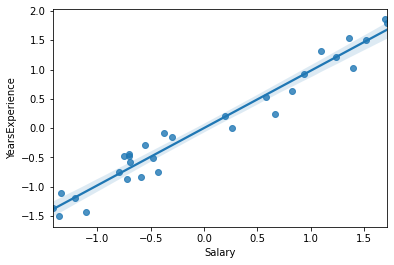

In [36]:
sns.regplot(x=df3.Salary,y=df3.YearsExperience, data=df3)

In [37]:
model2.params

Intercept            -0.018236
df.YearsExperience    1.049252
dtype: float64

In [38]:
(model2.tvalues, model2.pvalues)

(Intercept             -0.806598
 df.YearsExperience    24.950094
 dtype: float64,
 Intercept             4.266967e-01
 df.YearsExperience    1.143068e-20
 dtype: float64)

In [39]:
(model2.rsquared,model2.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

# log

In [48]:
from numpy import log

In [49]:
data4 = log(df1_copy)

In [50]:
data4

,YearsExperience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906
5,1.064711,10.944506
6,1.098612,11.004597
7,1.163151,10.904946
8,1.163151,11.073567
9,1.308333,10.954117


In [51]:
model3=smf.ols('data4.Salary~data4.YearsExperience', data= data4).fit()

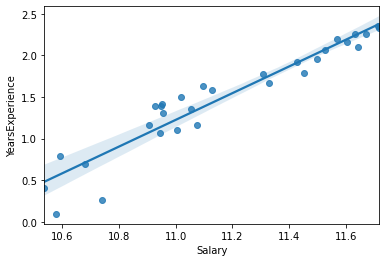

In [52]:
sns.regplot(x=data4.Salary,y=data4.YearsExperience, data=data4)

In [53]:
model3.params

Intercept                10.328043
data4.YearsExperience     0.562089
dtype: float64

In [54]:
(model3.tvalues, model3.pvalues)

(Intercept                184.867959
 data4.YearsExperience     16.352542
 dtype: float64,
 Intercept                9.073132e-45
 data4.YearsExperience    7.395278e-16
 dtype: float64)

In [55]:
(model3.rsquared,model3.rsquared_adj)

(0.9052150725817149, 0.9018298966024904)

# robust scalar

In [56]:
from sklearn.preprocessing import RobustScaler
array = df1_copy.values

In [57]:
 transformer = RobustScaler().fit_transform(array)

In [58]:
column_values = ['Salary','YearsExperience'] 
df4 = pd.DataFrame(data = transformer,   
                  columns = column_values)

In [59]:
model4=smf.ols('df4.Salary~df4.YearsExperience', data= df4).fit()

In [60]:
model4.params

Intercept             -0.105976
df4.YearsExperience    0.986192
dtype: float64

In [61]:
(model4.tvalues, model4.pvalues)

(Intercept              -4.048275
 df4.YearsExperience    24.950094
 dtype: float64,
 Intercept              3.691400e-04
 df4.YearsExperience    1.143068e-20
 dtype: float64)

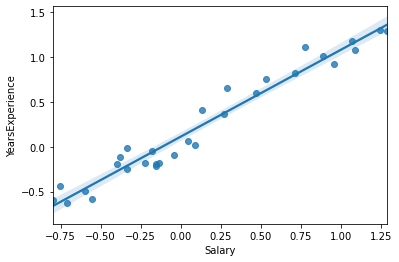

In [63]:
sns.regplot(x=df4.Salary,y=df4.YearsExperience, data=df4)

In [64]:
(model4.rsquared,model4.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)